In [1]:
# Translate "PlotAnalyticalModel_v2.m", Sam.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
cm = 1/2.54

$\tau_{2min} = \frac{f_{rupt}}{k\times V_{max}}$

$\tau = \frac{\tau_1}{\tau_{2min}}$ <br>

$f = \frac{f_{rupt}}{f_{stall}}$ <br>

$\gamma = \frac{1}{R_{temp}} - 1$

$\gamma_{crit} = (1 + \tau)^2\times \frac{f\times \tau}{2}$

$R_{crit} = \frac{1}{\gamma_{crit} + 1}$

$V_+ = \frac{1}{2}\times \frac{V_{max}}{\tau}\times (\tau - 1 + \sqrt{(1 - \tau)^2 + 4 \tau - 2 f \tau \gamma})$

$V_- = \frac{1}{2}\times \frac{V_{max}}{\tau}\times (\tau - 1 - \sqrt{(1 - \tau)^2 + 4 \tau - 2 f \tau \gamma})$

In [2]:
Vmax = 0.8; #0.83;           # Maximum gliding speed (um/s) # Ishigure 2014, Scharrel et al., Biophy, 2014
#Vmax = 0.35 # for sketch
k = 100.0;          # Spring constant (pN/um)
fstall = 5;       # Stall force (pN)
#frupt = 7;        # Rupture force (pN)

In [3]:

ActiveMotorRatio = []; Vplus = []; Vminus = []
R = []; Vp = []; Vm = []

for frupt in [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]:
    Tau1 = 0.2 # Binding period (s). 1/k_a See Ishigure & Nitta 2015 IEEE Trans. Nanobiosci.
    Tau2min = frupt/k/Vmax

    ActiveMotorRatioTemp = np.arange(0.01,1,0.0001) # 0.99 # 0.01,1,0.01 # 0.001 # 0.01

    Tau = Tau1/Tau2min
    f = frupt/fstall
    Gamma = 1.0/ActiveMotorRatioTemp - 1.0

    GammaCritical = ((1.0 + Tau)**2)/2.0/f/Tau
    ActiveMotorRatioCritical = 1.0/(GammaCritical + 1.0)

    #===================================================

    for I in range(len(Gamma)):
        if ActiveMotorRatioTemp[I] > ActiveMotorRatioCritical:
            ActiveMotorRatio.append( ActiveMotorRatioTemp[I] )
            Vplus.append( 0.5*Vmax/Tau*(Tau - 1.0 + np.sqrt((1.0 - Tau)**2 + 4.0*Tau - 2.0*f*Tau*Gamma[I])) )
            Vminus.append( 0.5*Vmax/Tau*(Tau - 1.0 - np.sqrt((1.0 - Tau)**2 + 4.0*Tau - 2.0*f*Tau*Gamma[I])) )
    R.append(ActiveMotorRatio)
    Vp.append(Vplus)
    Vm.append(Vminus)
    ActiveMotorRatio = []; Vplus = []; Vminus = []

In [4]:

ActiveMotorRatio = []; Vplus = []; Vminus = []
R = []; Vp = []; Vm = []

for frupt in [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]:
    Tau1 = 0.2 # Binding period (s). 1/k_a See Ishigure & Nitta 2015 IEEE Trans. Nanobiosci.
    Tau2min = frupt/k/Vmax

    ActiveMotorRatioTemp = np.arange(0.01,1,0.0001) # 0.99 # 0.01,1,0.01 # 0.01,1,0.00005

    Tau = Tau1/Tau2min
    f = frupt/fstall
    Gamma = 1.0/ActiveMotorRatioTemp - 1.0

    GammaCritical = ((1.0 + Tau)**2)/2.0/f/Tau
    ActiveMotorRatioCritical = 1.0/(GammaCritical + 1.0)

    #===================================================

    for I in range(len(Gamma)):
        if ActiveMotorRatioTemp[I] > ActiveMotorRatioCritical:
            ActiveMotorRatio.append( ActiveMotorRatioTemp[I] )
            Vplus.append( 0.5*Vmax/Tau*(Tau - 1.0 + np.sqrt((1.0 - Tau)**2 + 4.0*Tau - 2.0*f*Tau*Gamma[I])) )
            Vminus.append( 0.5*Vmax/Tau*(Tau - 1.0 - np.sqrt((1.0 - Tau)**2 + 4.0*Tau - 2.0*f*Tau*Gamma[I])) )
        elif ActiveMotorRatioTemp[I] < ActiveMotorRatioCritical:
            ActiveMotorRatio.append( ActiveMotorRatioTemp[I] )
            Vplus.append(0)
    R.append(ActiveMotorRatio)
    Vp.append(Vplus)
    Vm.append(Vminus)
    ActiveMotorRatio = []; Vplus = []; Vminus = []

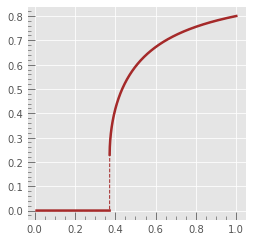

In [5]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(R[6][3622:],Vp[6][3622:], ls = '-', lw=2.5, color='brown', markerfacecolor='salmon')#'r-', label='$f_{rupt}$ = %.1f pN'%frupt) #,ActiveMotorRatio,Vminus,'b.',ActiveMotorRatioCritical,0.0,'ro')

ax.plot(R[6][:3622],Vp[6][:3622], ls = '-', lw=2.5, color='brown', markerfacecolor='salmon')#'r-', label='$f_{rupt}$ = %.1f pN'%frupt) #,ActiveMotorRatio,Vminus,'b.',ActiveMotorRatioCritical,0.0,'ro')

ax.plot(R[6],Vp[6], ls = '--', lw=1, color='brown', markerfacecolor='salmon')

# ax.axhline(y=0, color='k', lw=1)
# ax.axvline(x=0, color='k', lw=1)

# ax.set_xticks(np.arange(0,1,0.2))
# ax.set_yticks(np.arange(0,1,0.2))

#ax.set_xlabel('$r$', fontsize=14) # _{substrate}
#ax.set_ylabel('$v\ (\mu m/s)$', fontsize=14)

ax.minorticks_on()
ax.tick_params(direction='in', length=8, which = 'major')
ax.tick_params(direction='in', length=4, which = 'minor')

#ax.legend(loc='lower left')

#plt.savefig('fig/gldn_spd.png', format='png', dpi=700, bbox_inches='tight')

# plt.savefig('fig/gldn_spd_MT.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('fig/gldn_spd_MT.svg', format='svg', bbox_inches='tight')

# plt.savefig('fig/Fig6-microtubule-spd.svg', format='svg', bbox_inches='tight')

plt.show()

In [6]:
import subprocess
#subprocess.call('inkscape fig/gldn_spd_MT.svg -M fig/gldn_spd_MT.emf', shell=True)
subprocess.call('inkscape fig/Fig6-microtubule-spd.svg -M fig/Fig6-microtubule-spd.emf', shell=True)

0

In [47]:
Vp[6][3622:] #[41:]#37

[0.23013781065543726,
 0.23795537704000894,
 0.24258438302337298,
 0.24622506432738456,
 0.2493253025372535,
 0.2520714157524521,
 0.2545622569947477,
 0.25685775993050675,
 0.2589975160738643,
 0.26100930148750384,
 0.2629134937955714,
 0.26472556877321285,
 0.26645760801004326,
 0.2681192580524088,
 0.2697183668534975,
 0.27126142107061185,
 0.2727538554632749,
 0.2742002773438963,
 0.2756046329598603,
 0.27697033317772474,
 0.27830035001381354,
 0.2795972918741048,
 0.2808634629764694,
 0.2821009108393941,
 0.2833114646420377,
 0.2844967665130692,
 0.28565829727920383,
 0.2867973978273445,
 0.2879152869605647,
 0.2890130764266902,
 0.29009178364820276,
 0.2911523425691664,
 0.2921956129488429,
 0.2932223883655345,
 0.2942334031429414,
 0.29522933837120036,
 0.29621082716318964,
 0.29717845926157554,
 0.29813278509202334,
 0.29907431934184797,
 0.3000035441303109,
 0.3009209118261114,
 0.3018268475589215,
 0.3027217514646145,
 0.3036060006979227,
 0.3044799512413035,
 0.3053439395346

In [48]:
R[6][3622:]

[0.3721999999999978,
 0.3722999999999978,
 0.37239999999999784,
 0.37249999999999783,
 0.3725999999999978,
 0.3726999999999978,
 0.3727999999999978,
 0.3728999999999978,
 0.37299999999999783,
 0.3730999999999978,
 0.3731999999999978,
 0.3732999999999978,
 0.3733999999999978,
 0.37349999999999783,
 0.3735999999999978,
 0.3736999999999978,
 0.3737999999999978,
 0.3738999999999978,
 0.3739999999999978,
 0.3740999999999978,
 0.3741999999999978,
 0.3742999999999978,
 0.3743999999999978,
 0.3744999999999978,
 0.3745999999999978,
 0.3746999999999978,
 0.3747999999999978,
 0.3748999999999978,
 0.3749999999999978,
 0.3750999999999978,
 0.3751999999999978,
 0.3752999999999978,
 0.3753999999999978,
 0.3754999999999978,
 0.3755999999999978,
 0.3756999999999978,
 0.3757999999999978,
 0.3758999999999978,
 0.3759999999999978,
 0.37609999999999777,
 0.3761999999999978,
 0.3762999999999978,
 0.3763999999999978,
 0.3764999999999978,
 0.37659999999999777,
 0.3766999999999978,
 0.3767999999999978,
 0.3768

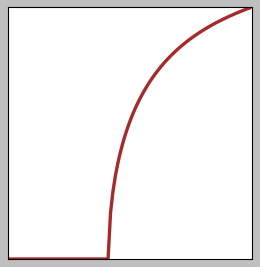

In [39]:
plt.style.use('classic')
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

#ax.plot(R[6][41:],Vp[6][41:], ls = '-', lw=3, color='brown', markerfacecolor='salmon')#'r-', label='$f_{rupt}$ = %.1f pN'%frupt) #,ActiveMotorRatio,Vminus,'b.',ActiveMotorRatioCritical,0.0,'ro')

#ax.plot(R[6][:41],Vp[6][:41], ls = '-', lw=3, color='brown', markerfacecolor='salmon')#'r-', label='$f_{rupt}$ = %.1f pN'%frupt) #,ActiveMotorRatio,Vminus,'b.',ActiveMotorRatioCritical,0.0,'ro')

#ax.plot(R[6][39:42],Vp[6][39:42], ls = '--', lw=1, color='brown', markerfacecolor='salmon')

ax.plot(R[6],Vp[6], ls = '-', lw=3, color='brown', markerfacecolor='salmon')#'r-', label='$f_{rupt}$ = %.1f pN'%frupt) #,ActiveMotorRatio,Vminus,'b.',ActiveMotorRatioCritical,0.0,'ro')


# ax.axhline(y=0, color='k', lw=1)
# ax.axvline(x=0, color='k', lw=1)

ax.set_xticks([])#np.arange(0,1,0.2))
ax.set_yticks([])#np.arange(0,1,0.2))
# ax.set_xlabel('$r$', fontsize=14) # _{substrate}
# ax.set_ylabel('$v$', fontsize=14)

# ax.minorticks_on()
# ax.tick_params(direction='in', length=8, which = 'major')
# ax.tick_params(direction='in', length=4, which = 'minor')

#ax.legend(loc='lower left')

#plt.savefig('fig/gldn_spd.png', format='png', dpi=700, bbox_inches='tight')

# plt.savefig('fig/gldn_spd_MT-sketch.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('fig/gldn_spd_MT-sketch.svg', format='svg', bbox_inches='tight')

plt.show()

In [40]:
import subprocess
subprocess.call('inkscape fig/gldn_spd_MT-sketch.svg -M fig/gldn_spd_MT-sketch.emf', shell=True)

0

In [6]:
mt_dta = pd.DataFrame({'r':R[6], 'v':Vp[6]})
mt_dta.to_csv('mt_data.csv', index = False)

In [7]:
mt = pd.read_csv('mt_data.csv')
act = pd.read_csv('act_data.csv')

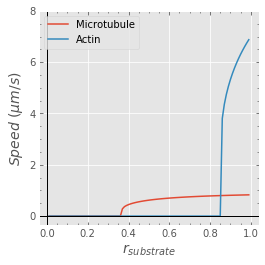

In [8]:
fig,ax = plt.subplots(1,1,figsize=(10*cm, 10*cm))

ax.plot(mt['r'],mt['v'], label='Microtubule')
ax.plot(act['r'], act['v'], label='Actin')

ax.axhline(y=0, color='k', lw=1)
ax.axvline(x=0, color='k', lw=1)

ax.set_xticks(np.arange(0,1.1,0.2))
ax.set_yticks(np.arange(0,9,2))
ax.set_xlabel('$r_{substrate}$', fontsize=14)
ax.set_ylabel('$Speed\ (\mu m/s)$', fontsize=14)
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.minorticks_on()
ax.legend(loc='upper left')

# plt.savefig('fig/gldn_spd_MT-ACT.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('fig/gldn_spd_MT-ACT.svg', format='svg', bbox_inches='tight')

plt.show()

In [126]:
import subprocess
subprocess.call('inkscape fig/gldn_spd_MT-ACT.svg -M fig/gldn_spd_MT-ACT.emf', shell=True)

0

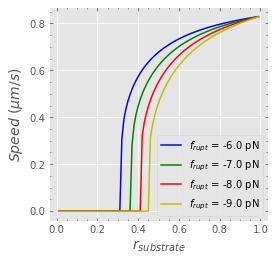

In [106]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(R[5],Vp[5], 'b-', label='$f_{rupt}$ = %.1f pN'%-6.0)
ax.plot(R[6],Vp[6], 'g-', label='$f_{rupt}$ = %.1f pN'%-7.0)
ax.plot(R[7],Vp[7], 'r-', label='$f_{rupt}$ = %.1f pN'%-8.0)
ax.plot(R[8],Vp[8], 'y-', label='$f_{rupt}$ = %.1f pN'%-9.0)

#ax.set_xticks(np.arange(0,1.1,0.2))
#ax.set_yticks(np.arange(0,9,2))
ax.set_xlabel('$r_{substrate}$', fontsize=14)
ax.set_ylabel('$Speed\ (\mu m/s)$', fontsize=14)
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.minorticks_on()
ax.legend()

#plt.savefig('fig/gldn_spds.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/gldn_spds.png', format='png', dpi=700, bbox_inches='tight')
plt.show()